In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
colab_directory_path = '/content/drive/MyDrive/Colab Notebooks/NLP/Project'

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/NLP/Project

/content/drive/MyDrive/Colab Notebooks/NLP/Project


In [ ]:
! git clone https://github.com/maartensap/riveter-nlp.git

fatal: destination path 'riveter-nlp' already exists and is not an empty directory.


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/NLP/Project/riveter-nlp/riveter

/content/drive/MyDrive/Colab Notebooks/NLP/Project/riveter-nlp/riveter


In [ ]:
!pip install -U spacy-experimental

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 669.5/669.5 kB 7.6 MB/s eta 0:00:00


In [ ]:
!pip install https://github.com/explosion/spacy-experimental/releases/download/v0.6.0/en_coreference_web_trf-3.4.0a0-py3-none-any.whl#egg=en_coreference_web_trf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.3/490.3 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.0/314.0 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 66.1 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.2
    Uninstalling wasabi-1.1.2:
      Successfully uninstalled wasabi-1.1.2
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.0
    Uninstalling tokenizers-0.15.0:
      Successfully uninstalled tokenizers-0.15.0
  Attempting uninstall: typer
    Found existing installation: typer 0.9.0
    Uninstalling typer-0.9.0:
      Successfully uninstalled typer-0.9.0
  Attempting uninstall: transformers
    Found 

In [ ]:
!python -m spacy download en_core_web_sm

2023-12-02 18:45:34.835837: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-02 18:45:34.835911: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-02 18:45:34.835959: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-02 18:45:34.863769: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-02 18:45:39.490240: W tensorflow/compiler/

In [ ]:
!pip install seaborn

<br><br><br><br>

## **Import libraries**

In [ ]:
from collections import defaultdict
import os
import pandas as pd
import random
from riveter import Riveter
import seaborn as sns
import matplotlib.pyplot as plt

## Reduce dataset size

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Project/FinalBalancedDataset.csv'  )
print(df.head())
print(df.info())

   Unnamed: 0  Toxicity                                              tweet
0           0         0   @user when a father is dysfunctional and is s...
1           1         0  @user @user thanks for #lyft credit i can't us...
2           2         0                                bihday your majesty
3           3         0  #model   i love u take with u all the time in ...
4           4         0             factsguide: society now    #motivation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56745 entries, 0 to 56744
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  56745 non-null  int64 
 1   Toxicity    56745 non-null  int64 
 2   tweet       56745 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.3+ MB
None


In [ ]:
import pandas as pd
# Reduce dataset size to 10000 samples

file_path = '/content/drive/MyDrive/Colab Notebooks/NLP/Project/FinalBalancedDataset.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Separate rows based on the 'toxicity' column
label_0_rows = df[df['Toxicity'] == 0].head(5000)
label_1_rows = df[df['Toxicity'] == 1].head(5000)

# Concatenate the selected rows into a new DataFrame
new_dataset = pd.concat([label_0_rows, label_1_rows], ignore_index=True)

# Write the new dataset to a new CSV file
new_dataset.to_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Project/toxicTweet.csv', index=False)

# Display information about the new dataset
print(new_dataset.info())
new_dataset.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   Toxicity    10000 non-null  int64 
 2   tweet       10000 non-null  object
dtypes: int64(2), object(1)
memory usage: 234.5+ KB
None


,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation


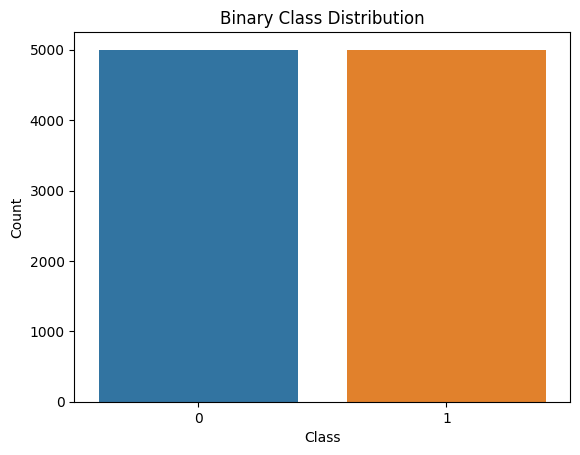

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   Toxicity    10000 non-null  int64 
 2   tweet       10000 non-null  object
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [ ]:
# classes distribution

file_path = '/content/drive/MyDrive/Colab Notebooks/NLP/Project/toxicTweet.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Assuming 'toxicity' is the column representing binary classes (0 and 1)
class_distribution = df['Toxicity'].value_counts()

# Plot a barchart using seaborn
sns.countplot(x='Toxicity', data=df)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Binary Class Distribution')
plt.show()
df.info()


## Add persona column


In [ ]:
# Extract tweets and their indices
tweets = df['tweet'].tolist()
indices = list(df.index)

# Display the first few tweets and their indices
for i in range(min(5, len(tweets))):  # Display the first 5 tweets as an example
    print(f"Index {indices[i]}: {tweets[i]}")


Index 0:  @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
Index 1: @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
Index 2:   bihday your majesty
Index 3: #model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  
Index 4:  factsguide: society now    #motivation


In [ ]:
# Load lexicon ("power") and train model
riveter = Riveter()
riveter.load_sap_lexicon('power')
riveter.train(tweets,
              indices)

100%|██████████| 10000/10000 [1:18:15<00:00,  2.13it/s]

2023-12-02 20:05:53 Complete!


In [ ]:
#get cumulative power scores for each persona mentioned in the dataset
riveter.get_score_totals(frequency_threshold=1)

{'father': -0.10526315789473684,
 'i': -0.006101694915254237,
 'they': 0.04830917874396135,
 'wheelchair vans': -1.0,
 'disputes': -1.0,
 'we': 0.06964285714285715,
 'land': -0.18181818181818182,
 '@user': 0.015560165975103735,
 'cookies': 1.0,
 'people': -0.013071895424836602,
 'ha for': -0.3333333333333333,
 'free kick knowing bale': -1.0,
 '#upsideofflorida #shopalyssas': 0.0,
 '50 people': 0.0,
 "1 man's actions": 0.0,
 'this cycle': 0.0,
 ' @user': 0.018518518518518517,
 'you': 0.07168276563294357,
 'bull': -0.6521739130434783,
 'once more only one word': 0.0,
 'it': -0.05396825396825397,
 'oh, #cedarpoint': -1.0,
 'book': -0.3333333333333333,
 'bookworm': 0.0,
 'playoffs': 0.3333333333333333,
 'mom': -0.0625,
 'something': -0.2702702702702703,
 'blue #illustration': 0.0,
 'best pa': 0.5,
 '»': -0.2,
 '#abc2020': 1.0,
 'victums': -1.0,
 'pulseclub': -1.0,
 '#prayfororlando': -0.4,
 'baroque pieces': -1.0,
 "right' mindset": 1.0,
 'every man': 0.3333333333333333,
 'journey': -0.333

In [ ]:
# example of a tweet
riveter.get_scores_for_doc(1)

{'i': 1.0, 'they': 1.0, 'wheelchair vans': -1.0}

In [ ]:

def get_highest_score_keywords(riveter, num_docs):
    highest_score_keywords = []

    for index in range(num_docs):
        scores_dict = riveter.get_scores_for_doc(index)

        if scores_dict:
            # Find the key with the maximum value in the dictionary
            max_key = max(scores_dict, key=scores_dict.get)

            # Append the key to the list
            highest_score_keywords.append(max_key)
        else:
            # Handle the case where the scores dictionary is empty
            highest_score_keywords.append('None')

    return highest_score_keywords

result = []
num_docs = 10000
result = get_highest_score_keywords(riveter, num_docs)

# Display the result
print(result)


['father', 'i', 'None', 'i', 'None', 'disputes', 'None', 'None', 'we', 'None', 'None', 'None', 'i', 'None', 'None', '@user', 'we', 'ha for', 'None', 'None', 'None', '#upsideofflorida #shopalyssas', 'None', 'None', 'None', '50 people', 'this cycle', 'None', ' @user', 'None', 'you', 'None', 'once more only one word', 'oh, #cedarpoint', 'None', 'you', 'playoffs', 'None', 'mom', 'None', 'None', 'i', 'something', 'blue #illustration', 'best pa', '#abc2020', 'we', 'None', ' @user', 'you', 'baroque pieces', 'None', 'None', 'None', "right' mindset", 'None', 'None', 'None', 'None', 'None', 'every man', 'None', 'ð\x9f\x98\x84ð\x9f\x91\x8dð\x9f\x8f»ð\x9f\x9b³', 'None', 'None', 'None', 'itð\x9f\x92ªð\x9f\x8f¼', 'None', 'probe', '@user', 'None', 'few brows', 'None', '#innovative learning space', 'gun control', 'power', 'None', 'None', 'None', 'i', 'new episodes', 'None', ' 15 things', 'None', 'daughter', 'this station', 'None', 'i', 'None', 'None', 'None', 'None', 'None', 'None', ' â\x86\x9d #eur/u

In [ ]:
# Add the persona column to the dataset
import csv
import re

# Open the input file containing tweet data
with open('/content/drive/MyDrive/Colab Notebooks/NLP/Project/toxicTweet.csv', 'r') as file:
    reader = csv.reader(file)
    data = list(reader)

# Add a header for the new column
data[0].append('persona')
persona = get_highest_score_keywords(riveter, num_docs)
for i in range(1, 10000):
  data[i].append(persona[i])

# Write the updated data to a new file
with open('/content/drive/MyDrive/Colab Notebooks/NLP/Project/ToxicTweetsDataset2.csv', 'w', newline='') as file:

    writer = csv.writer(file)
    writer.writerows(data)



In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/NLP/Project/ToxicTweetsDataset2.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,Toxicity,tweet,persona
0,0,0,@user when a father is dysfunctional and is s...,i
1,1,0,@user @user thanks for #lyft credit i can't us...,None
2,2,0,bihday your majesty,i
3,3,0,#model i love u take with u all the time in ...,None
4,4,0,factsguide: society now #motivation,disputes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   Toxicity    10000 non-null  int64 
 2   tweet       10000 non-null  object
 3   persona     9996 non-null   object
dtypes: int64(2), object(2)
memory usage: 312.6+ KB
